## Beta Computation

In [149]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
import yfinance as yf
import math as mt
import statistics as st
from datetime import datetime
import plotly.graph_objects as go
import plotly.express as px
import scipy.stats as stats

plt.style.use('seaborn-v0_8-darkgrid')

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [19]:
class stock:
    def __init__(self, ticker, time):
        self.ticker = ticker 
        self.time = time
        
    def chart(self):
        return yf.download(self.ticker, period=self.time)

In [20]:
ftse = stock("^FTSE", "5Y").chart()

[*********************100%***********************]  1 of 1 completed


In [21]:
ftse.describe()

Open         High          Low        Close    Adj Close  \
count  1261.000000  1261.000000  1261.000000  1261.000000  1261.000000   
mean   7076.787411  7121.313903  7030.609825  7076.504333  7076.504333   
std     555.071503   543.523899   566.605103   554.949292   554.949292   
min    4993.899902  5181.000000  4898.799805  4993.899902  4993.899902   
25%    6885.299805  6938.299805  6836.100098  6885.299805  6885.299805   
50%    7211.600098  7250.100098  7170.299805  7211.600098  7211.600098   
75%    7467.399902  7504.600098  7427.899902  7466.700195  7466.700195   
max    8014.299805  8047.100098  7995.500000  8014.299805  8014.299805   

             Volume  
count  1.261000e+03  
mean   8.086921e+08  
std    2.992643e+08  
min    0.000000e+00  
25%    6.319410e+08  
50%    7.452301e+08  
75%    9.032731e+08  
max    2.585566e+09

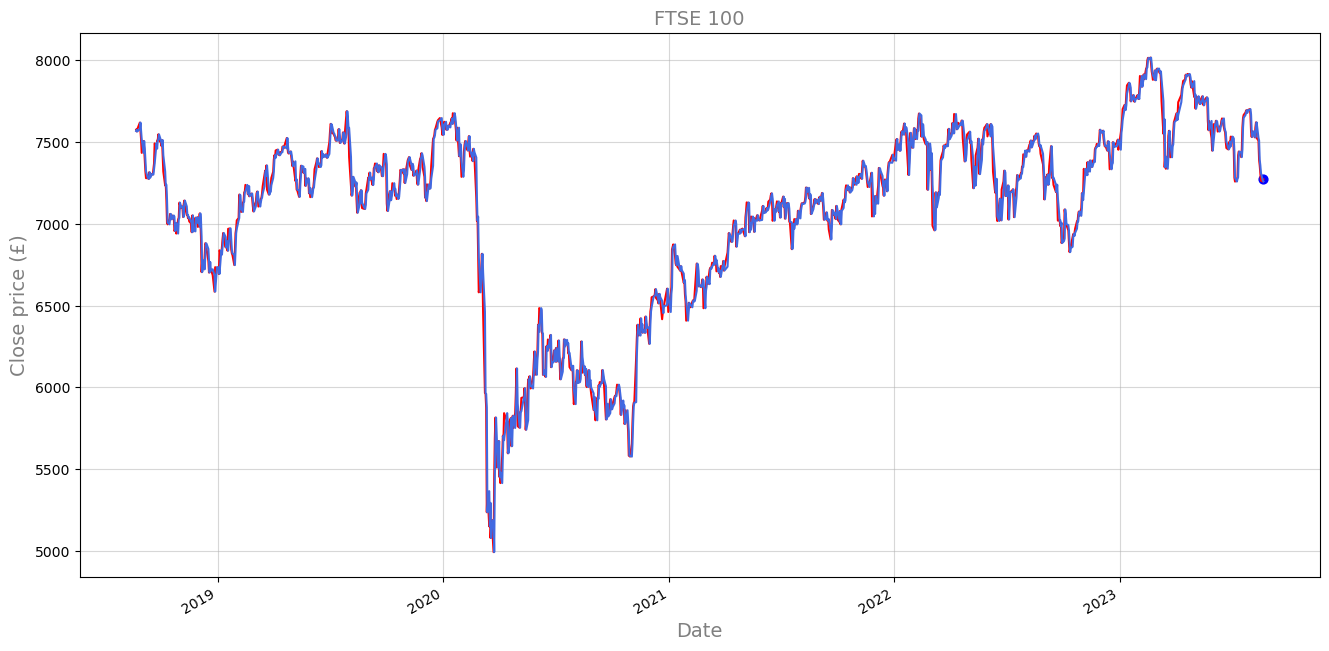

In [22]:
plt.figure(figsize=(16,8))
ftse.Close.plot(color="red")
ftse.Open.plot(color="royalblue")
plt.scatter(ftse.index[-1], ftse.Close[-1], s=40, color="blue")
plt.grid(True, alpha=0.5)
plt.title("FTSE 100", fontsize=14, color="grey")
plt.ylabel("Close price (£)", fontsize=14, color="grey")
plt.xlabel("Date", fontsize=14, color="grey")
plt.show()

In [23]:
burberry = stock("BRBY.L", "5Y").chart()

[*********************100%***********************]  1 of 1 completed


In [24]:
burberry['Close'] = burberry['Close']/100
burberry['Open'] = burberry['Open']/100

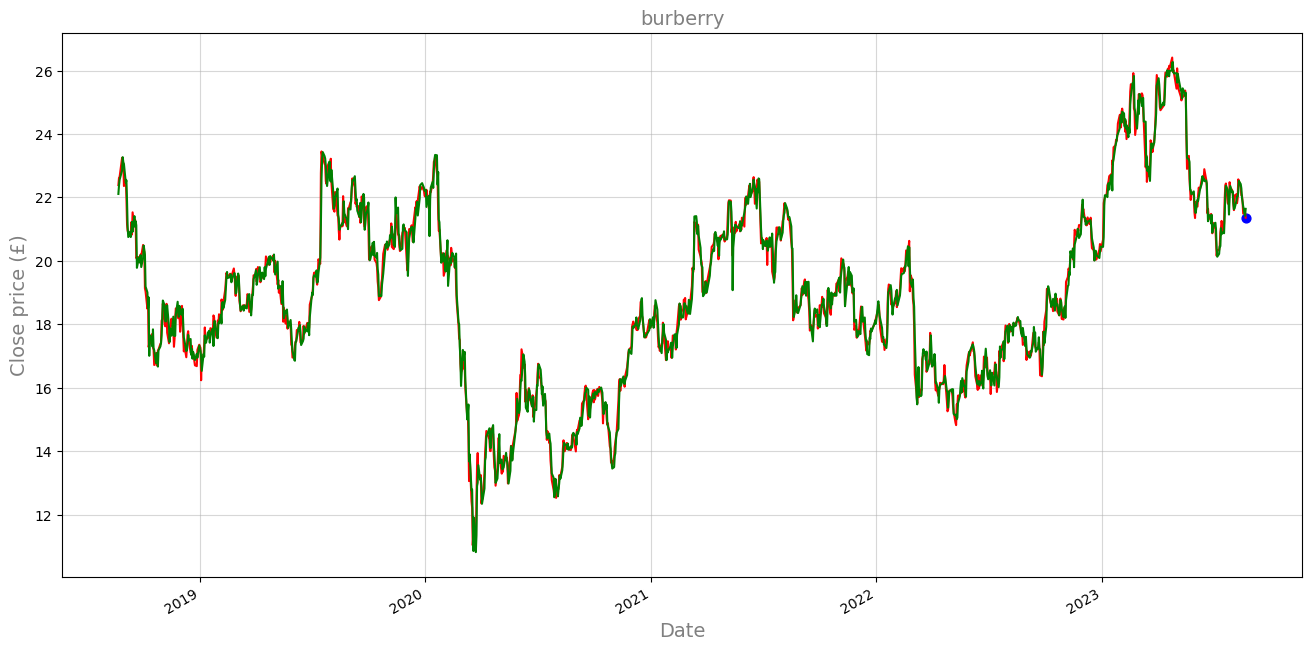

In [26]:
plt.figure(figsize=(16,8))
burberry.Close.plot(color="red")
plt.scatter(burberry.index[-1], burberry.Close[-1], s=40, color="blue")
burberry.Open.plot(color="green")
plt.grid(True, alpha=0.5)
plt.title("burberry", fontsize=14, color="grey")
plt.ylabel("Close price (£)", fontsize=14, color="grey")
plt.xlabel("Date", fontsize=14, color="grey")
plt.show()

In [27]:
burberry.describe()

Open         High          Low        Close    Adj Close  \
count  1262.000000  1262.000000  1262.000000  1262.000000  1262.000000   
mean     18.979283  1923.795165  1871.666252    18.977345  1782.330021   
std       2.855390   284.107367   285.800652     2.858364   291.975601   
min      10.815000  1130.500000  1017.000000    10.850000  1004.167175   
25%      17.180000  1742.625000  1692.625000    17.186250  1592.098755   
50%      18.802500  1905.000000  1854.750000    18.772500  1761.370239   
75%      21.000000  2120.750000  2076.500000    20.987500  1957.560547   
max      26.270000  2656.000000  2617.000000    26.410000  2586.030762   

             Volume  
count  1.262000e+03  
mean   1.585587e+06  
std    8.976698e+05  
min    3.977900e+04  
25%    9.909880e+05  
50%    1.314909e+06  
75%    1.939618e+06  
max    6.396838e+06

In [28]:
data = {"FTSE": ftse.Close,
       "BRBY": burberry.Close}
data = pd.DataFrame(data)
data.tail()

FTSE   BRBY
Date                          
2023-08-16  7356.899902  22.06
2023-08-17  7310.200195  21.85
2023-08-18  7262.399902  21.49
2023-08-21  7257.799805  21.53
2023-08-22  7270.759766  21.36

In [29]:
returns = np.log(data/data.shift(1))
returns.dropna(inplace=True)
returns.tail()

FTSE      BRBY
Date                          
2023-08-16 -0.004435 -0.000453
2023-08-17 -0.006368 -0.009565
2023-08-18 -0.006560 -0.016613
2023-08-21 -0.000634  0.001860
2023-08-22  0.001784 -0.007927

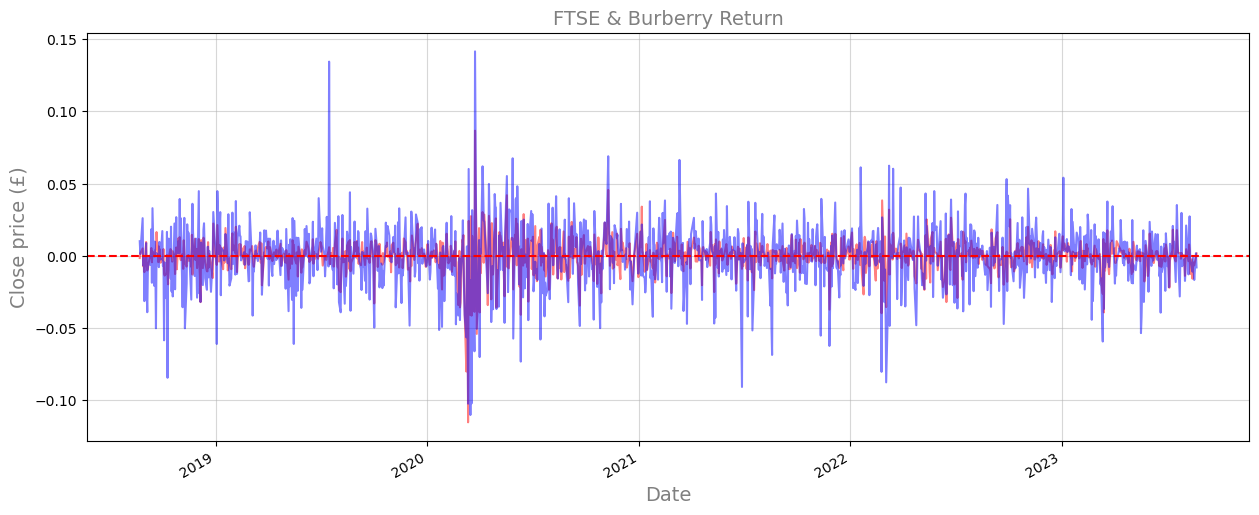

In [30]:
plt.figure(figsize=(15,6))
returns.FTSE.plot(color="red", alpha=0.5)
returns.BRBY.plot(color="blue", alpha=0.5)
plt.grid(True, alpha=0.5)
plt.title("FTSE & Burberry Return", fontsize=14, color="grey")
plt.axhline(0, color="red", linestyle="--")
plt.ylabel("Close price (£)", fontsize=14, color="grey")
plt.xlabel("Date", fontsize=14, color="grey")
plt.show()

In [31]:
ftse_var = returns.FTSE.var()
ftse_var

0.0001277015312051753

In [32]:
returns_cov = returns.cov()
returns_cov

FTSE      BRBY
FTSE  0.000128  0.000161
BRBY  0.000161  0.000483

In [33]:
#FTSE100 and AZN covariance 
st.covariance(returns.FTSE, returns.BRBY)

0.00016116432612800957

In [34]:
beta = st.covariance(returns.FTSE, returns.BRBY)/st.variance(returns.FTSE)

In [35]:
X = returns['FTSE'].values.reshape(-1, 1)
y = returns['BRBY'].values

In [36]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [37]:
print(f"Beta of Burberry : {model.coef_[0]}")

Beta of Burberry : 1.2620391048332094


In [38]:
model.intercept_

1.705209043975063e-05

In [39]:
y_pred = model.predict(X)
y_pred[:10]

array([-0.00181714,  0.00240095,  0.00661189, -0.00896168, -0.00788372,
       -0.0140992 ,  0.01221765, -0.007861  , -0.01267047, -0.01102195])

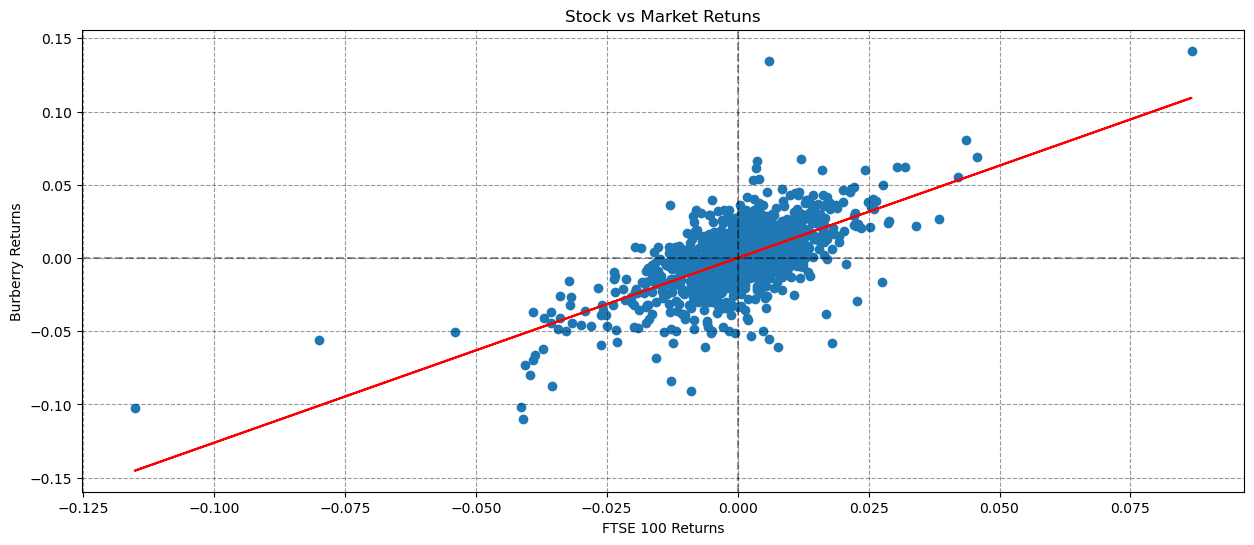

In [40]:
plt.figure(figsize=(15,6))
plt.scatter(X,y)
plt.plot(X, y_pred, color="red")
plt.title("Stock vs Market Retuns")
plt.xlabel("FTSE 100 Returns")
plt.axhline(0, color="black", linestyle="--", alpha=0.4)
plt.axvline(0, color="black", linestyle="--", alpha=0.4)
plt.ylabel("Burberry Returns")
plt.grid(True, color="black", alpha=0.4, linestyle="--")
plt.show()

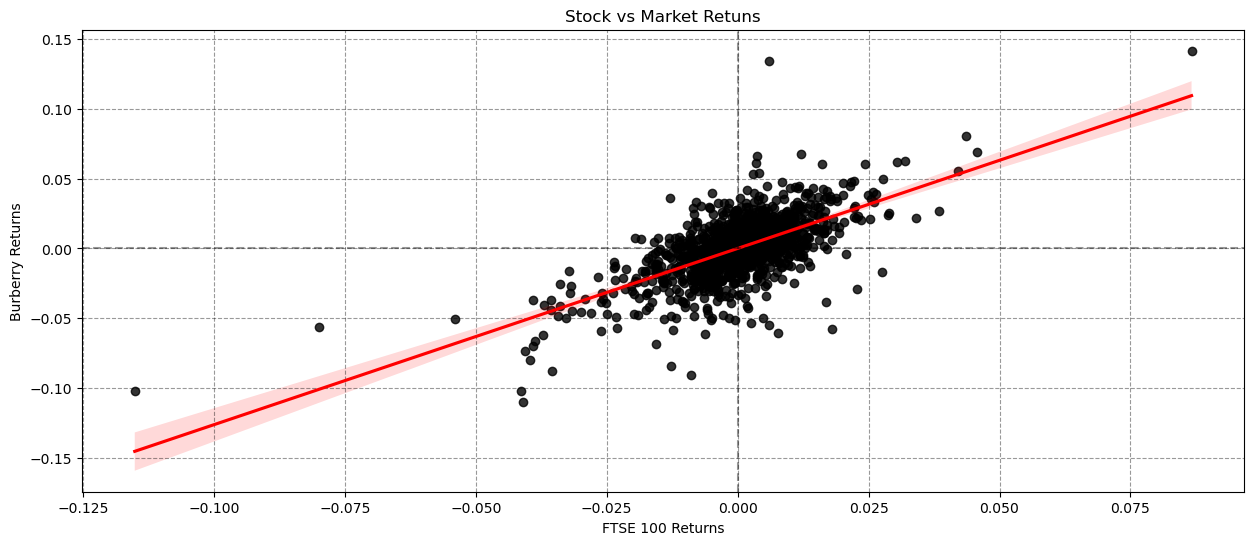

In [41]:
plt.figure(figsize=(15,6))
sns.regplot(x = "FTSE", y = "BRBY", data = returns, scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.title("Stock vs Market Retuns")
plt.xlabel("FTSE 100 Returns")
plt.axhline(0, color="black", linestyle="--", alpha=0.4)
plt.axvline(0, color="black", linestyle="--", alpha=0.4)
plt.ylabel("Burberry Returns")
plt.grid(True, color="black", alpha=0.4, linestyle="--")

# Portfolio Optimization

In this project, I took the 10 biggest companies in terms of market capitalization. Let's try to build an optimal investment portfolio.

In [79]:
stock_ticker = ['GOOGL', 'GOOG', 'BRK-B','META', 'NVDA', 'MSFT', 'UNH', 'AMZN', 'AAPL', 'TSLA']

In [121]:
portfolio = stock(stock_ticker, "8Y").chart()
portfolio = portfolio['Adj Close']
portfolio.head()


[*********************100%***********************]  10 of 10 completed


AAPL       AMZN       BRK-B       GOOG      GOOGL       META  \
Date                                                                            
2015-08-24  23.400688  23.168501  129.570007  29.480499  30.905500  82.089996   
2015-08-25  23.541378  23.318501  127.739998  29.103001  30.623501  83.000000   
2015-08-26  24.891596  25.038500  132.610001  31.431000  32.987000  87.190002   
2015-08-27  25.624563  25.918501  136.229996  31.880501  33.397999  89.730003   
2015-08-28  25.708530  25.900499  135.740005  31.518999  32.984501  91.010002   

                 MSFT      NVDA       TSLA         UNH  
Date                                                    
2015-08-24  36.866283  5.036255  14.591333   97.776474  
2015-08-25  35.796036  4.931688  14.668667   97.378044  
2015-08-26  37.777313  5.303752  14.989333  100.459267  
2015-08-27  38.829891  5.503160  16.199333  104.275429  
2015-08-28  38.856419  5.527479  16.565332  103.841576

In [122]:
fig = px.line(portfolio, x=portfolio.index, y=portfolio.columns, title = 'Price change of stocks in our Portfolio from Aug 2018')
fig.show()

## Volatility computation

In [123]:
stock_returns = np.log(portfolio/portfolio.shift(1))
stock_returns = stock_returns.dropna()
stock_returns

AAPL      AMZN     BRK-B      GOOG     GOOGL      META  \
Date                                                                     
2015-08-25  0.005994  0.006453 -0.014224 -0.012888 -0.009166  0.011024   
2015-08-26  0.055771  0.071168  0.037416  0.076953  0.074346  0.049249   
2015-08-27  0.029021  0.034542  0.026932  0.014200  0.012382  0.028716   
2015-08-28  0.003271 -0.000695 -0.003603 -0.011404 -0.012458  0.014164   
2015-08-31 -0.004689 -0.009933 -0.012603 -0.019430 -0.018157 -0.017513   
...              ...       ...       ...       ...       ...       ...   
2023-08-16 -0.004971 -0.019066 -0.001101 -0.008944 -0.008357 -0.025696   
2023-08-17 -0.014662 -0.008103 -0.002601  0.010402  0.009435 -0.031761   
2023-08-18  0.002812 -0.005689 -0.001785 -0.018177 -0.019116 -0.006475   
2023-08-21  0.007707  0.010900 -0.001334  0.006380  0.007114  0.023206   
2023-08-22  0.007874 -0.003198 -0.004326  0.005877  0.005516 -0.007965   

                MSFT      NVDA      TSLA       UNH  
Date                                                
2015-08-25 -0.029460 -0.020981  0.005286 -0.004083  
2015-08-26  0.053872  0.072733  0.021625  0.031152  
2015-08-27  0.027482  0.036908  0.077631  0.037283  
2015-08-28  0.000683  0.004409  0.022342 -0.004169  
2015-08-31 -0.009377 -0.011060  0.002332 -0.013564  
...              ...       ...       ...       ...  
2023-08-16 -0.002431 -0.010386 -0.032103 -0.006197  
2023-08-17 -0.011047 -0.003271 -0.028688 -0.019248  
2023-08-18 -0.001263 -0.001039 -0.017161  0.009029  
2023-08-21  0.016919  0.081316  0.070715 -0.001526  
2023-08-22  0.001800 -0.028047  0.008224 -0.010788  

[2012 rows x 10 columns]

In [131]:
fig = px.line((1+stock_returns).cumprod(), x=stock_returns.index, y=stock_returns.columns, title = 'Cumulative Returns of stocks in our Portfolio from Aug 2015')
fig.show()

We can observe that the TESLA stock have better results, so it should have a higher volatility

In [132]:
daily_vol = stock_returns.std()
monthly_vol = daily_vol*np.sqrt(21) #assuming we have 21 trading days in a month

# Annualized Volatility
annual_vol = daily_vol*np.sqrt(252)
annual_vol

AAPL     0.296493
AMZN     0.332053
BRK-B    0.204226
GOOG     0.285122
GOOGL    0.284495
META     0.393867
MSFT     0.281124
NVDA     0.493572
TSLA     0.580002
UNH      0.265871
dtype: float64

Our hypothesis was good, the TESLA stock volatility is higher than the others stock (56% for annual volatility)

We also can check the distribution of returns 

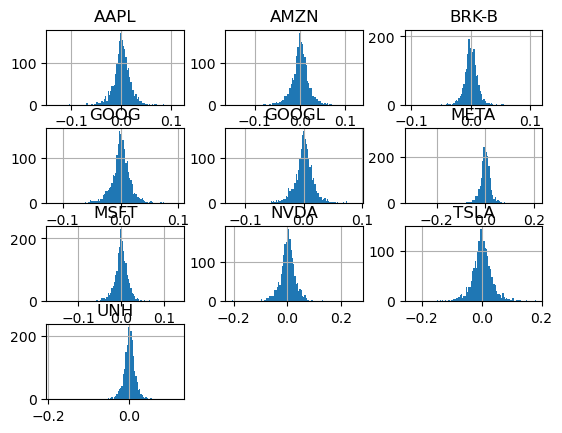

In [133]:
stock_returns.hist(bins=100)
plt.show()

All the returns seems to be normally distributed

In [134]:
stock_returns_means = stock_returns.mean()*252
stock_returns_means

AAPL     0.253589
AMZN     0.220050
BRK-B    0.124665
GOOG     0.185545
GOOGL    0.179043
META     0.157031
MSFT     0.271624
NVDA     0.564535
TSLA     0.347117
UNH      0.202462
dtype: float64

In this portfolio, we can observe that Tesla has the highest annualized returns (~48%)

## Analysis of returns

In statistics, skewness is a degree of asymmetry observed in a probability distribution that deviates from the symmetrical normal distribution (bell curve) in a given set of data.

Kurtosis is a statistical measure that quantifies the shape of a probability distribution. It provides information about the tails and peakedness of the distribution compared to a normal distribution.

Positive kurtosis indicates heavier tails and a more peaked distribution, while negative kurtosis suggests lighter tails and a flatter distribution. Kurtosis helps in analyzing the characteristics and outliers of a dataset.

https://www.analyticsvidhya.com/blog/2021/05/shape-of-data-skewness-and-kurtosis/

Here to check is the data is normally distributed, we need to check if:
1. Excess Kurtosis = 0 (K-0=0)
2. Skewness = 0

In [146]:
summary = round(stock_returns.describe().T, 4)
#_get_numeric_data get all the numeric data in the DF
summary['Skew'] = stats.skew(stock_returns._get_numeric_data()).round(5)
summary['Kurt'] = stats.kurtosis(stock_returns._get_numeric_data()).round(5)
summary = summary.drop('count', axis=1)
summary

mean     std     min     25%     50%     75%     max     Skew  \
AAPL   0.0010  0.0187 -0.1377 -0.0075  0.0009  0.0104  0.1132 -0.21609   
AMZN   0.0009  0.0209 -0.1514 -0.0087  0.0012  0.0112  0.1269 -0.03186   
BRK-B  0.0005  0.0129 -0.1008 -0.0055  0.0005  0.0067  0.1098 -0.25200   
GOOG   0.0007  0.0180 -0.1177 -0.0069  0.0009  0.0094  0.0994 -0.13728   
GOOGL  0.0007  0.0179 -0.1237 -0.0072  0.0010  0.0096  0.0919 -0.18309   
META   0.0006  0.0248 -0.3064 -0.0093  0.0010  0.0122  0.2093 -1.52970   
MSFT   0.0011  0.0177 -0.1595 -0.0068  0.0010  0.0100  0.1329 -0.13931   
NVDA   0.0022  0.0311 -0.2077 -0.0125  0.0027  0.0177  0.2609  0.18986   
TSLA   0.0014  0.0365 -0.2365 -0.0159  0.0013  0.0193  0.1814 -0.16589   
UNH    0.0008  0.0167 -0.1897 -0.0069  0.0009  0.0084  0.1204 -0.43056   

           Kurt  
AAPL    5.45560  
AMZN    4.98652  
BRK-B  10.77838  
GOOG    4.47840  
GOOGL   4.35939  
META   27.69384  
MSFT    7.70158  
NVDA    7.20445  
TSLA    4.38871  
UNH    15.09889

1. Apple, Amazon, Berkshire, Google, Meta, Microsoft, Tesla and UnitedHealth have a negtive skewness. this means these distributions have a long left tail. Their returns are more concentrated on the rigth tail of the distribution. Investors should expect frequent small gains and some large losses 

2. All stocks feature heavy tails (kurtosis >> 0). So we can say that these stocks will potentially have more frequent high returns 

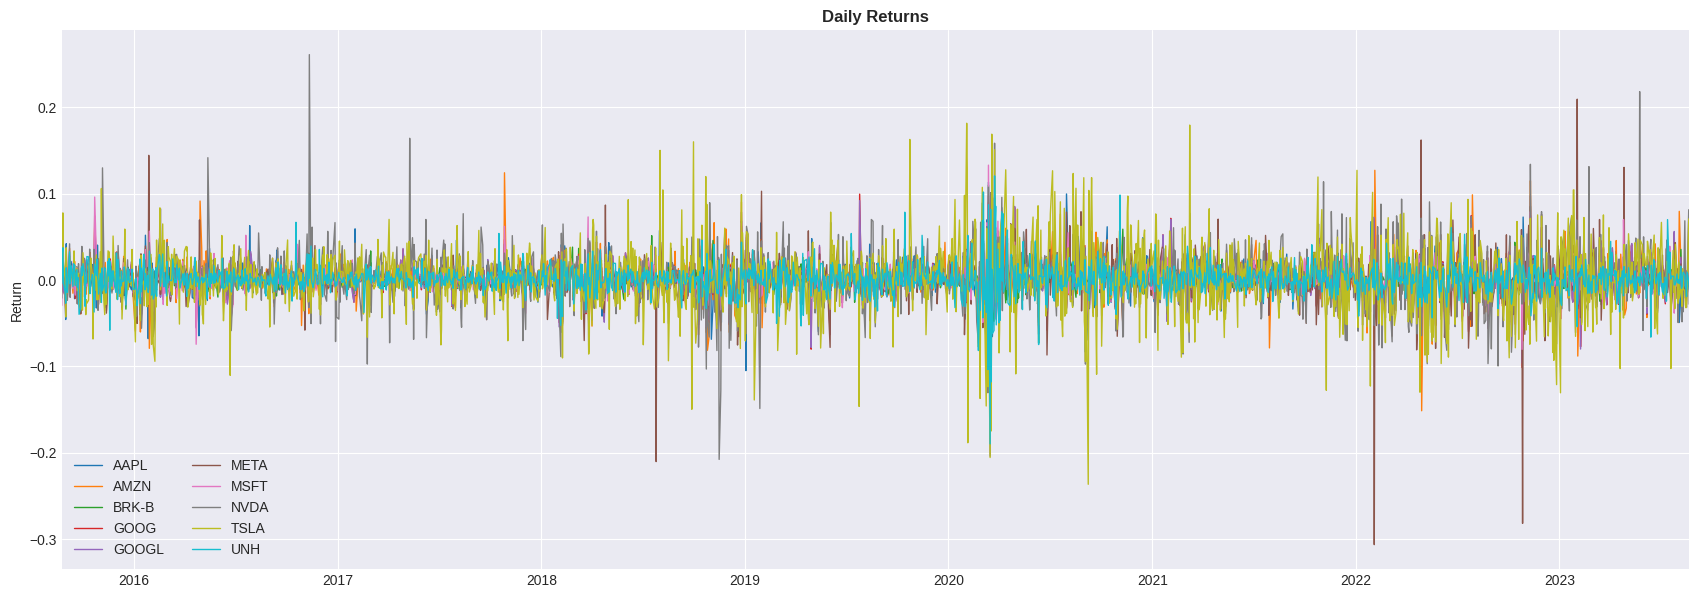

In [150]:
plt.figure(figsize=(21,7))
for col in stock_returns:
    plt.plot(stock_returns.index, stock_returns[col], marker='', linewidth=1, label=col)
    plt.legend(loc='lower left', ncol=2)
    plt.margins(x=0)
    plt.title('Daily Returns', weight='bold')
    plt.ylabel('Return')

Now let's check the Daily returns distribution

Text(0.5, 1.0, 'Daily returns distribution')

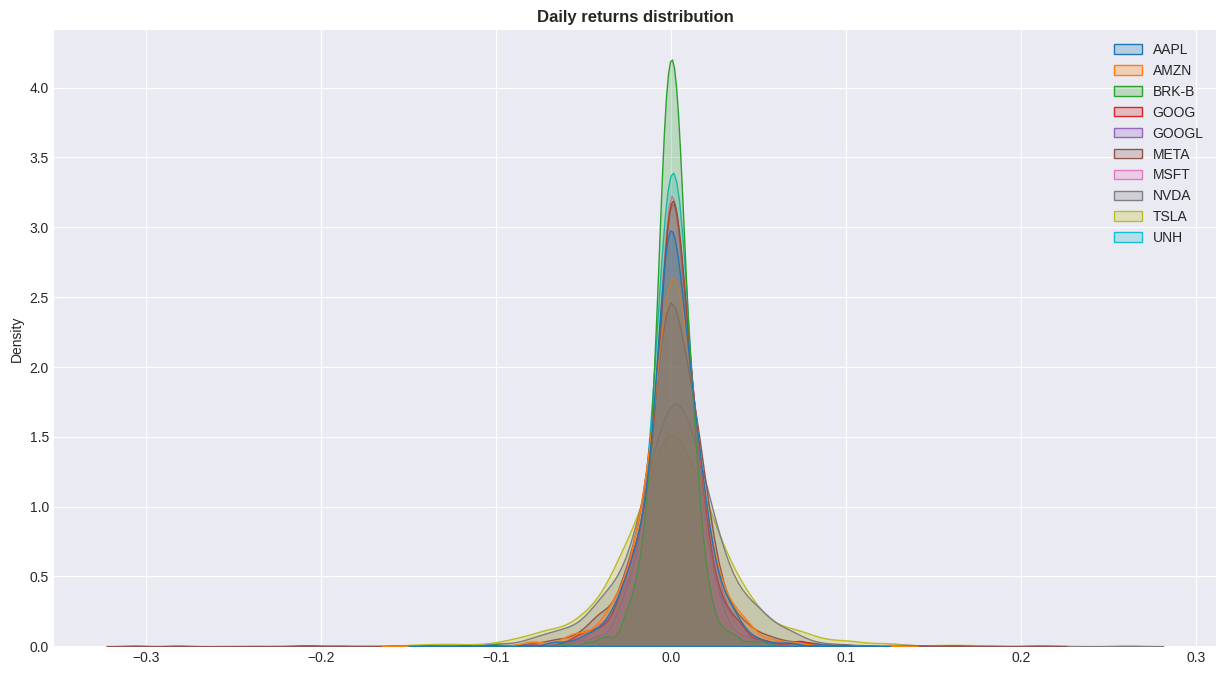

In [155]:
fig = plt.figure(figsize=(15,8))
sns.kdeplot(data=stock_returns, fill=True)
plt.title('Daily returns distribution', weight='bold')

Text(0.5, 1.0, 'Daily returns distribution')

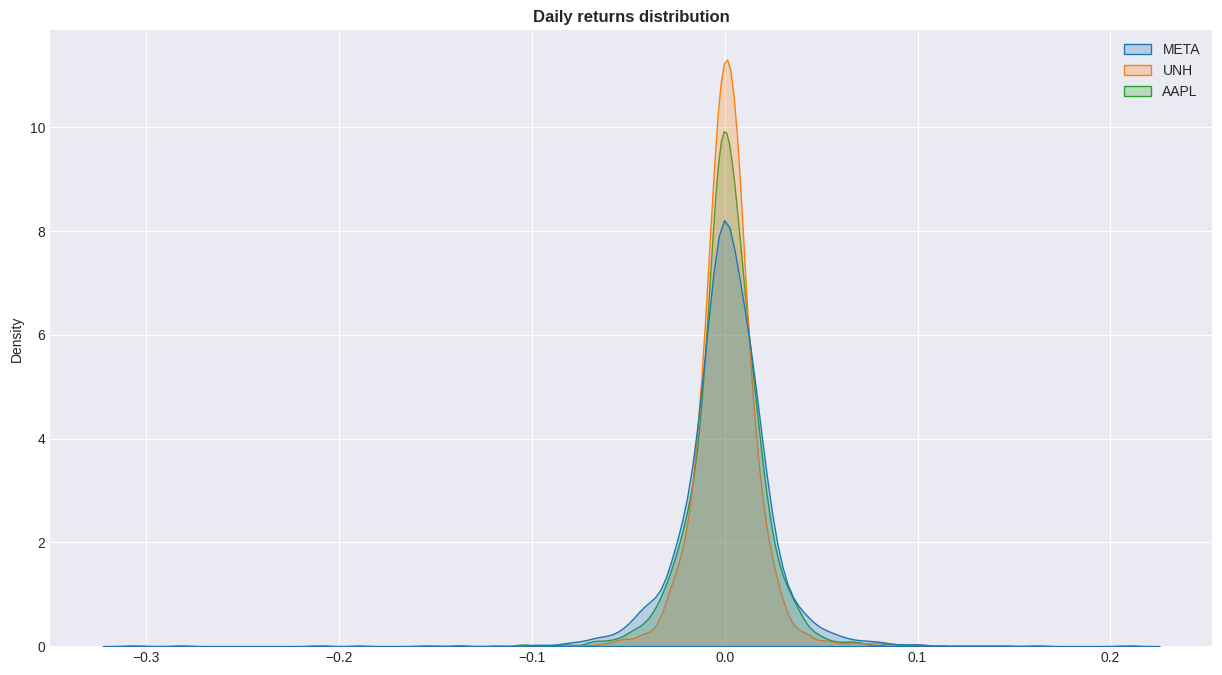

In [157]:
fig = plt.figure(figsize=(15,8))
sns.kdeplot(data=stock_returns[['META','UNH', 'AAPL']], fill=True)
plt.title('Daily returns distribution', weight='bold')

As we said earlier, META or UNH have heavier tails, or wider distribution. This means these stocks have an higher volatility associated.

In [159]:
dates_ret_min_max = pd.DataFrame({'Min Return': stock_returns.idxmin(),
'Max Return': stock_returns.idxmax()})
dates_ret_min_max

Min Return Max Return
AAPL  2020-03-16 2020-03-13
AMZN  2022-04-29 2022-02-04
BRK-B 2020-03-12 2020-03-13
GOOG  2020-03-16 2019-07-26
GOOGL 2020-03-16 2019-07-26
META  2022-02-03 2023-02-02
MSFT  2020-03-16 2020-03-13
NVDA  2018-11-16 2016-11-11
TSLA  2020-09-08 2020-02-03
UNH   2020-03-16 2020-03-24

For all these stocks, they have been at the lowest and the highest position around 2020 at the most part. It could be correlated to an high volatiity during Covid-19.

Let's compute the Sharpe Ratio now which compares the return of an investment with its risk.

The Sharpe ratio divides a portfolio's excess returns by a measure of its volatility to assess risk-adjusted performance

Excess returns are those above an industry benchmark or the risk-free rate of return

A Sharpe ratio of 1.5 indicates that the investment is generating 1.5 units of excess return for each unit of risk taken, relative to the risk-free rate. Generally speaking, a Sharpe ratio between 1 and 2 is considered good.

$$sharpe\_ratio = \frac{R_{p}-R_{f}}{\sigma_{p}}$$ where $R_{f}$ is the risk-free rate.\
https://www.investopedia.com/terms/s/sharperatio.asp

In [161]:
ret_stats = stock_returns.agg(['mean','std']).T
ret_stats.columns=['Return','Risk']
ret_stats['Return'] = ret_stats['Return']*252
ret_stats['Risk'] = ret_stats['Risk']*np.sqrt(252)
#Rf come from the risk-free rate for 10Y US bond
ret_stats['Sharpe_Ratio']=(ret_stats['Return']-0.0434)/ret_stats['Risk']
ret_stats = ret_stats.sort_values('Sharpe_Ratio', ascending=False)
ret_stats

Return      Risk  Sharpe_Ratio
NVDA   0.564535  0.493572      1.055844
MSFT   0.271624  0.281124      0.811826
AAPL   0.253589  0.296493      0.708916
UNH    0.202462  0.265871      0.598269
AMZN   0.220050  0.332053      0.531995
TSLA   0.347117  0.580002      0.523648
GOOG   0.185545  0.285122      0.498543
GOOGL  0.179043  0.284495      0.476783
BRK-B  0.124665  0.204226      0.397917
META   0.157031  0.393867      0.288500

### Calculation Drawdown

The drawdown refers to how much an investment or trading account is down from the peak before it recovers back to the peak.

For example, if a trading account has $\$10,000$ in it, and the funds drop to $\$9,000$ before moving back above $\$10,000$, then the trading account witnessed a 10\% drawdown.(source: https://www.investopedia.com/terms/d/drawdown.asp)

A dropdown is an important risk factor.

In [135]:
def drawdown_computation(return_series):
    wealth_index = 1000*(1+return_series).cumprod()
    prev_peaks = wealth_index.cummax()
    drawdown = (wealth_index - prev_peaks)/prev_peaks
    return drawdown.min(), drawdown

In [136]:
min_drawdown, drawdown = drawdown_computation(stock_returns)
drawdown.min()

AAPL    -0.401615
AMZN    -0.618939
BRK-B   -0.319189
GOOG    -0.482305
GOOGL   -0.479546
META    -0.817506
MSFT    -0.406101
NVDA    -0.718677
TSLA    -0.798813
UNH     -0.396146
dtype: float64

<Axes: xlabel='Date'>

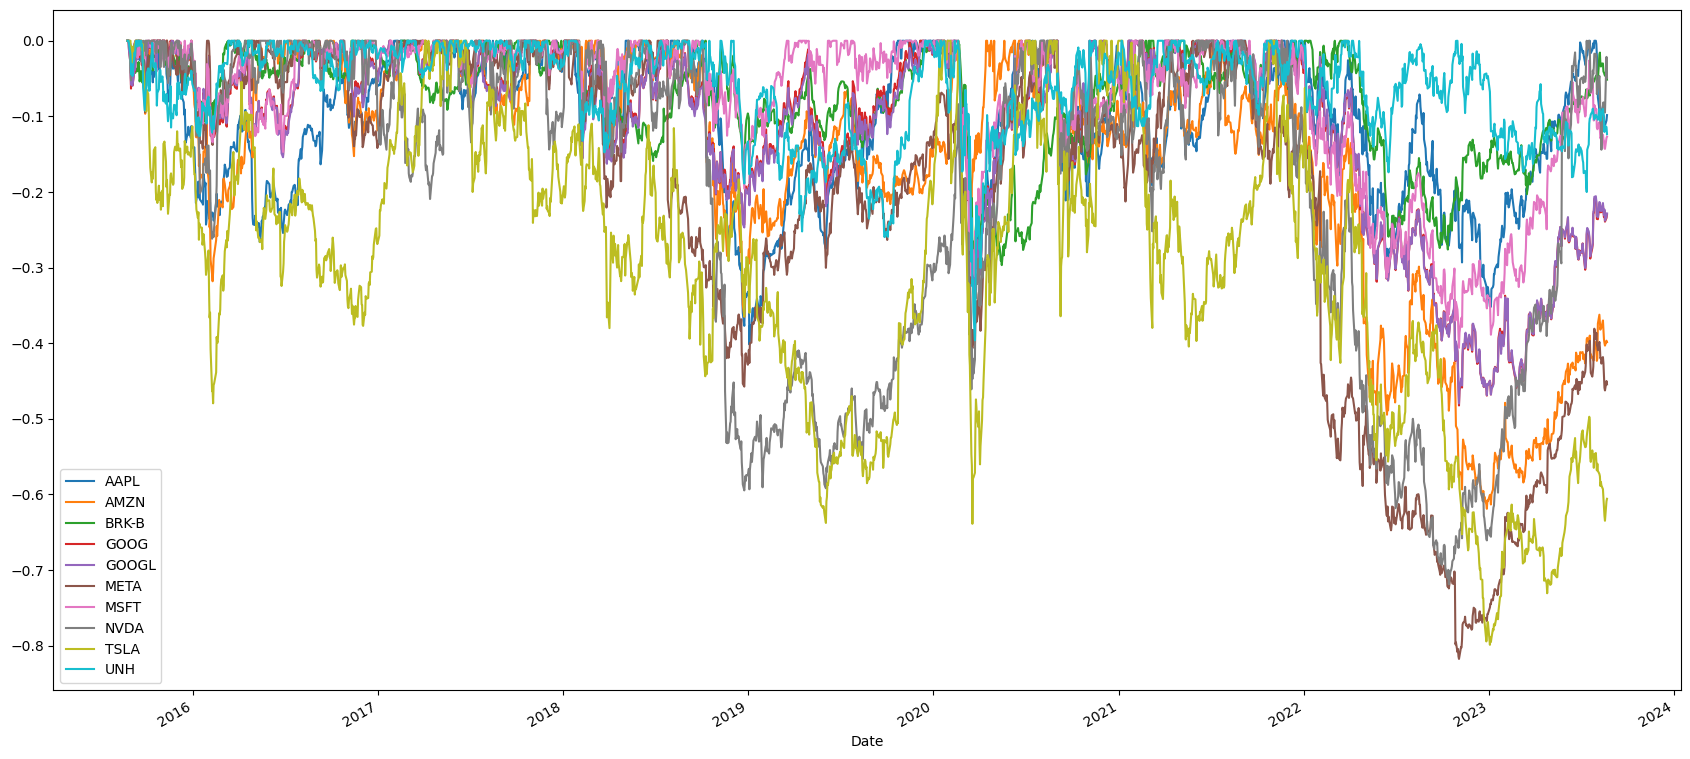

In [137]:
drawdown.plot(figsize = (21,10))